In [162]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import pandas as pd
#matplotlib.rcParams["figure.figsize"]=(20,10)

In [163]:
df1=pd.read_csv("D:\\data\\Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [164]:
df1.dtypes


area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [165]:
df2=df1.drop(['area_type','availability','balcony','society'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [166]:
df2.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [167]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [168]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [169]:
df2.shape

(13320, 5)

In [170]:
df3=df2.dropna()
df3.shape

(13246, 5)

In [171]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [172]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\user\AppData\Local\Temp/ipykernel_5772/2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [173]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [174]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [175]:
df4=df3[df3['bhk']<20]
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [176]:
df4.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

In [177]:
df4['total_sqft'].unique

<bound method Series.unique of 0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13244, dtype: object>

In [178]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [179]:
is_float(12.9)

True

In [180]:
is_float(67)

True

In [181]:
len(df4['total_sqft'].unique())

2067

In [182]:
len(df4['location'].unique())

1303

In [183]:
k=is_float('2400')
print(k)
float(k)

True


1.0

In [184]:
df4[~df4['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [185]:
def to_avgnum(x):
    num=x.split('-')
    if len(num) == 2:
        avg=(float(num[0])+float(num[1]))/2
        return avg
    try:
        return float(x)
    except:
        return None

In [186]:
k=to_avgnum('799')
k

799.0

In [187]:
k=to_avgnum('300Sq. Yards')
k

In [188]:
k=to_avgnum('799 - 803')
k

801.0

In [189]:
df5=df4.copy()
df5['total_sqft']=df5['total_sqft'].apply(to_avgnum)
df5 = df5[df5.total_sqft.notnull()]
df5

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [190]:
df5.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [191]:
df5.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

In [192]:
df6=df5.copy()
df6['price_per_sqft']=(df6['price']/df6['total_sqft'])*100000
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [193]:
df6.loction=df6.location.apply(lambda x: x.strip())

C:\Users\user\AppData\Local\Temp/ipykernel_5772/3435993835.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df6.loction=df6.location.apply(lambda x: x.strip())


In [194]:
df6.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [195]:
df6.shape

(13198, 7)

In [196]:
location_stats=df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
#df5.location.value_counts()
location_stats

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1297, dtype: int64

In [197]:
len(location_stats)

1297

In [198]:
len(location_stats[location_stats<=10])

1057

In [199]:
len(df5.location.unique())

1297

In [200]:
df6.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [201]:
df6[list(df6['total_sqft'].isnull())]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [202]:

df7=df6[~df6['total_sqft'].isnull()]
df7.shape

(13198, 7)

In [203]:
location_stats_lessthan10=location_stats[location_stats<5]
location_stats_lessthan10.shape

(857,)

In [204]:
df7['location']=df7['location'].apply(lambda x: 'other' if x in location_stats_lessthan10 else x )
len(df7['location'].unique())

441

In [205]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [206]:
df7['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Ramakrishnappa Layout',
       'Manayata Tech Park', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'Ganga Nagar', 'HSR Layout',
       'Doddathoguru', 'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Varthur', 'Bommanahalli', 'Gunjur', 'Hegde Nagar',
       'Haralur Road', 'Hennur Road', 'Kothannur', 'Kalena Agrahara',
       'Cholanayakanahalli', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapur

In [207]:
df8=df7[~((df7.total_sqft/df5.bhk)<300)]
df8.shape

(12456, 7)

In [208]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [209]:
df8.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [210]:
import numpy as np
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(df.price_per_sqft)
        st=np.std(df.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
                                                        
    
df9=remove_pps_outliers(df8)
df9.shape


(11294, 7)

((139, 7), (174, 7))

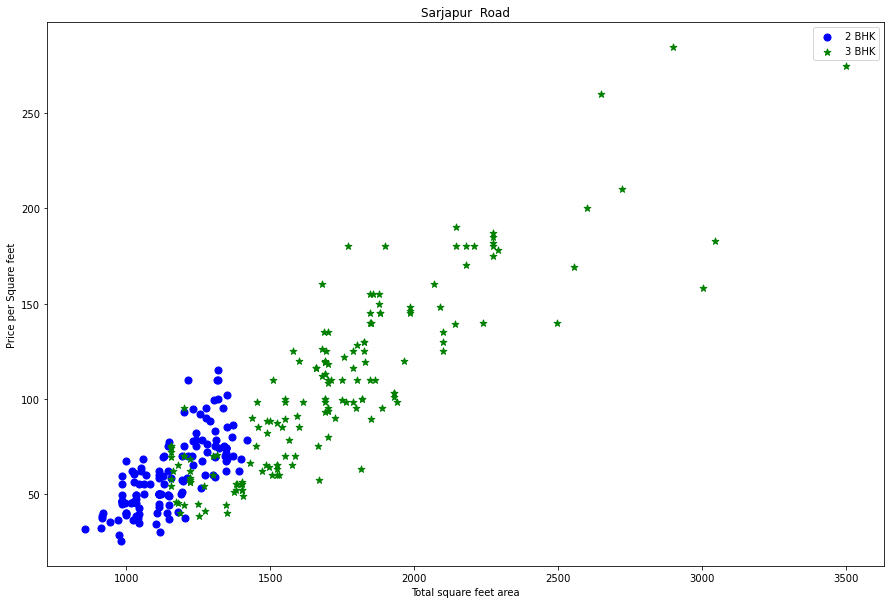

In [211]:
def plot_scatterchart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='*',label='3 BHK',s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price per Square feet")
    plt.title(location)
    plt.legend()
    return bhk2.shape,bhk3.shape
    
plot_scatterchart(df9,'Sarjapur  Road')
  


In [212]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
            bhk_stats={}
            for bhk,bhk_df in location_df.groupby('bhk'):
                bhk_stats[bhk]={
                    'mean': np.mean(bhk_df.price_per_sqft),
                    'std': np.std(bhk_df.price_per_sqft),
                    'count': bhk_df.shape[0]
                }
            #print(bhk_stats)  
            for bhk,bhk_df in location_df.groupby('bhk'):
                stats=bhk_stats.get(bhk-1)
                
                if stats and stats['count']>5:
                    
                    exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                    
    
    return df.drop(exclude_indices,axis='index')                  
               
                

df10=remove_bhk_outliers(df9)

In [213]:

df10.shape

(8644, 7)

((72, 7), (122, 7))

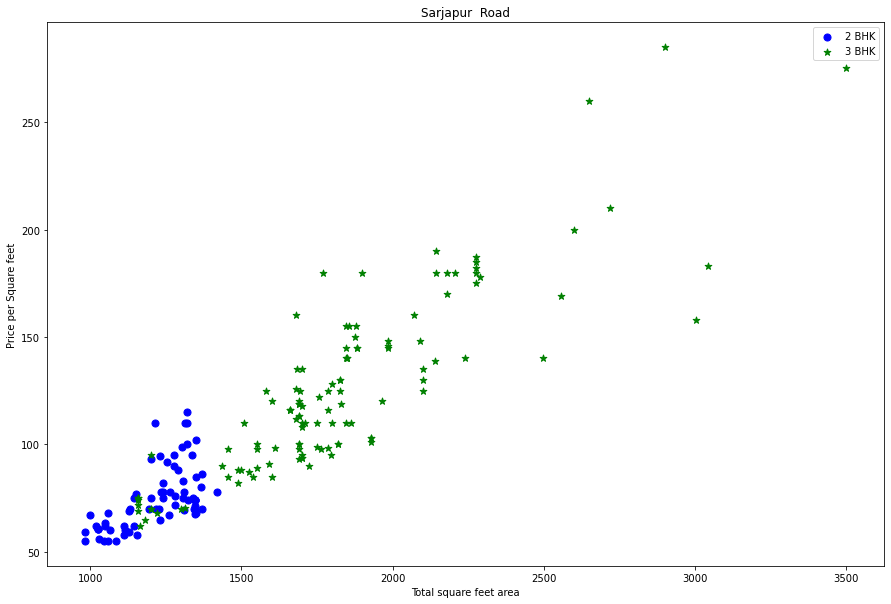

In [214]:
plot_scatterchart(df10,'Sarjapur  Road')

Text(0, 0.5, 'count')

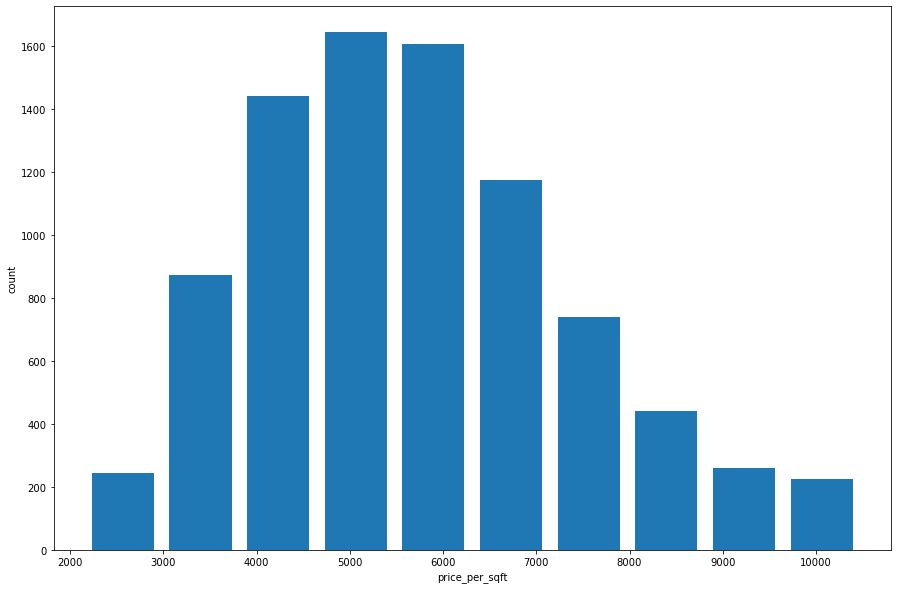

In [215]:
import matplotlib.pyplot as plt
plt.hist(df10.price_per_sqft,rwidth=.8)
plt.rcParams['figure.figsize']=(20,10)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

In [216]:
df10[df10.bath>(df10.bhk+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2124,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6767,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
8139,Sathya Sai Layout,6 BHK,11338.0,9.0,1000.0,6,8819.897689
8745,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [217]:
df11=df10[df10.bath<(df10.bhk+2)]
df11.shape

(8563, 7)

Text(0, 0.5, 'count')

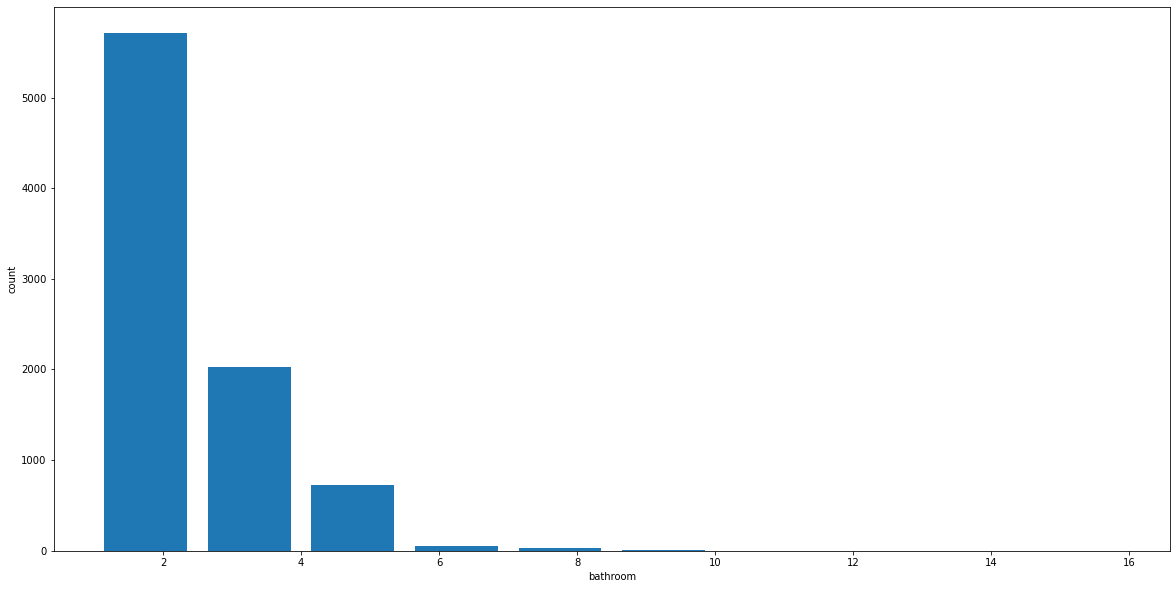

In [218]:
plt.hist(df11.bath,rwidth=.8)
plt.rcParams['figure.figsize']=(20,10)
plt.xlabel('bathroom')
plt.ylabel('count')

In [219]:
df12=df11.drop(['size','price_per_sqft'],axis='columns')
df12.head()

,location,total_sqft,bath,price,bhk
0,Devarabeesana Halli,1100.0,2.0,70.0,2
1,Devarabeesana Halli,1672.0,3.0,150.0,3
2,Devarabeesana Halli,1750.0,3.0,149.0,3
3,Devarabeesana Halli,1670.0,3.0,160.0,3
4,Devarabeesana Halli,1750.0,3.0,150.0,3


In [220]:
df12.shape

(8563, 5)

In [221]:
dum=pd.get_dummies(df12.location)
dum.head()

,Devarabeesana Halli,Devarachikkanahalli,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Phase JP Nagar,2nd Phase Judicial Layout,...,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
dum_fin=dum.drop('other',axis='columns')

In [223]:
df13=pd.concat([df12,dum_fin],axis='columns')
df13.head()

,location,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,Devarabeesana Halli,1100.0,2.0,70.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarabeesana Halli,1672.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarabeesana Halli,1750.0,3.0,149.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarabeesana Halli,1670.0,3.0,160.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarabeesana Halli,1750.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
df14=df13.drop('location',axis=1)
df14.head()

,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,1100.0,2.0,70.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1672.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,149.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1670.0,3.0,160.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
X=df14.drop('price',axis=1)
X.head(1)

,total_sqft,bath,bhk,Devarabeesana Halli,Devarachikkanahalli,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,1100.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
y=df14.price
y.head()

0     70.0
1    150.0
2    149.0
3    160.0
4    150.0
Name: price, dtype: float64

In [227]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=10)

In [228]:
from sklearn.linear_model import LinearRegression
lir=LinearRegression()

In [229]:
lir.fit(X_train,y_train)

LinearRegression()

In [230]:
lir.score(X_test,y_test)

0.8276944533374031

In [231]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=4, test_size=0.20, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 8.79565893e-01, -3.32369971e+13,  8.23419656e-01,  8.42786435e-01])

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_suitable_gridsearch(X,y):
    algos={
        'Linear_Regression': {
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False],
                
            }
        },
        'Lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
                
            }
        },
        'DecisionTreeRegressor':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
                
            }
        }
    }
    score=[]
    cv=ShuffleSplit(n_splits=5,test_size=.2,random_state=0)
    for algo,algo_model in algos.items():
        grid_search=GridSearchCV(algo_model['model'],algo_model['params'],cv=cv,return_train_score=False)
        grid_search.fit(X,y)
        score.append({
            'model':algo,
            'params':grid_search.best_params_,
            'score':grid_search.best_score_
            
        })
    return pd.DataFrame(score)
find_suitable_gridsearch(X,y)

,model,params,score
0,Linear_Regression,{'normalize': False},-1.864783e+14
1,Lasso,"{'alpha': 2, 'selection': 'random'}",8.246932e-01
2,DecisionTreeRegressor,"{'criterion': 'friedman_mse', 'splitter': 'best'}",8.050614e-01


In [320]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1

    return lir.predict([x])[0]
        


In [323]:
predict_price('Volagerekallahalli',1000,2,2)

29.467775389564004

In [324]:
predict_price('Indira Nagar',1000,2,2)

92.40249103614074

In [325]:
predict_price('1st Phase JP Nagar',1000,2,2)

88.0194511542327

In [328]:
X.head()

,total_sqft,bath,bhk,Devarabeesana Halli,Devarachikkanahalli,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,1100.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1672.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1670.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [330]:
import pickle
with open('banglalore_price_detection model.pickle','wb')as f:
    pickle.dump(lir,f)

In [331]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
    
}
with open("columns.json",'w')as f:
    f.write(json.dumps(columns))